In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [2]:
minst = input_data.read_data_sets("./data/", one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [4]:
print(minst.train.images.shape)
print(minst.test.images.shape)

(55000, 784)
(10000, 784)


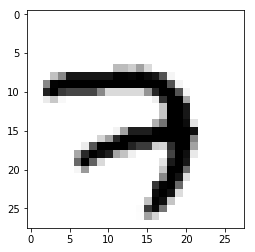

In [14]:
example = minst.train.images[0].reshape(28, 28)
plt.figure(figsize = (4, 4))
plt.imshow(example, cmap = "Greys")
plt.show()

In [17]:
# 1. Placeholders
# 2. Variables 
# 3. Graph
# 4. Loss
# 5. Optimizer
# 6. Session

In [20]:
x = tf.placeholder(tf.float32, shape = [None, 784])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.matmul(x, W) + b

y_true = tf.placeholder(tf.float32, shape = [None, 10])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_true, logits = y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)

train = optimizer.minimize(cross_entropy)

init = tf.global_variables_initializer()

In [25]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        batch_x, batch_y = minst.train.next_batch(1000)
        sess.run(train, feed_dict = {x: batch_x, y_true: batch_y})
    
    correct_prediction = tf.equal(tf.arg_max(y, 1), tf.arg_max(y_true, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    print(sess.run(accuracy, feed_dict = {x: minst.test.images, y_true: minst.test.labels}))

0.9212
